In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import nltk, re, pprint
from nltk import word_tokenize


DATA_PATH = os.getcwd() + '\\data_cleaner\\output'

df_C = pd.read_csv (DATA_PATH +'\\C.csv') 
df_Python = pd.read_csv (DATA_PATH +'\\Python.csv') 
df_Javascript = pd.read_csv (DATA_PATH +'\\Javascript.csv') 
df_Go = pd.read_csv (DATA_PATH +'\\Go.csv') 

In [2]:
df_C.head()

,author,text
0,laruence,Hi: I am thinking of make a release(maybe a ta...
1,laruence,thanks
2,torvalds,So we use libgit2 in subsurface as one of the ...
3,torvalds,Apparently patchwork will corrupt author names...
4,LiveOverflow,Describe the bug Crest Ocean has a weird behav...


In [3]:
df_C['tokenized_text'] = df_C['text'].apply(word_tokenize) 
df_C.head()

,author,text,tokenized_text
0,laruence,Hi: I am thinking of make a release(maybe a ta...,"[Hi, :, I, am, thinking, of, make, a, release,..."
1,laruence,thanks,[thanks]
2,torvalds,So we use libgit2 in subsurface as one of the ...,"[So, we, use, libgit2, in, subsurface, as, one..."
3,torvalds,Apparently patchwork will corrupt author names...,"[Apparently, patchwork, will, corrupt, author,..."
4,LiveOverflow,Describe the bug Crest Ocean has a weird behav...,"[Describe, the, bug, Crest, Ocean, has, a, wei..."


In [4]:
df_Go['tokenized_text'] = df_Go['text'].apply(word_tokenize) 
df_Python['tokenized_text'] = df_Python['text'].apply(word_tokenize) 
df_Javascript['tokenized_text'] = df_Javascript['text'].apply(word_tokenize) 

## Average text length

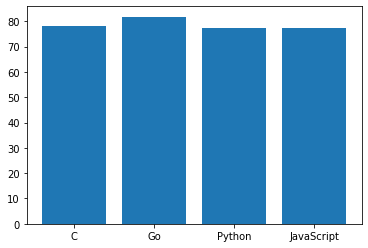

In [12]:
df_C['length'] = df_C['tokenized_text'].apply(len)
df_Go['length'] = df_Go['tokenized_text'].apply(len)
df_Python['length'] = df_Python['tokenized_text'].apply(len)
df_Javascript['length'] = df_Javascript['tokenized_text'].apply(len)


means = [np.mean(df_C['length']), np.mean(df_Go['length']), np.mean(df_Python['length']), np.mean(df_Javascript['length']) ]
widths  = [1, 2, 3, 4 ]
labels =['C', 'Go', 'Python', 'JavaScript']
plt.bar(widths, means, tick_label = labels,
        width = 0.8)
plt.show()

## Average lexical diversity

How diverse is vocabulary of a single entry?

In [14]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [15]:
df_C['lex_div'] = df_C['text'].apply(lexical_diversity)
df_Go['lex_div'] = df_Go['text'].apply(lexical_diversity)
df_Python['lex_div'] = df_Python['text'].apply(lexical_diversity)
df_Javascript['lex_div'] = df_Javascript['text'].apply(lexical_diversity)

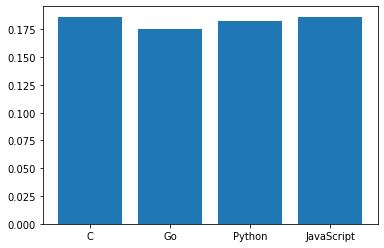

In [16]:
means = [np.mean(df_C['lex_div']), np.mean(df_Go['lex_div']), np.mean(df_Python['lex_div']), np.mean(df_Javascript['lex_div'])]
plt.bar(widths, means, tick_label = labels,
        width = 0.8)
plt.show()

## Total lexical diversity

How all enries are similar to each other?

In [17]:
all_C = ' '.join(df_C['text'])
all_Go = ' '.join(df_Go['text'])
all_Python = ' '.join(df_Python['text'])
all_Javascript = ' '.join(df_Javascript['text'])

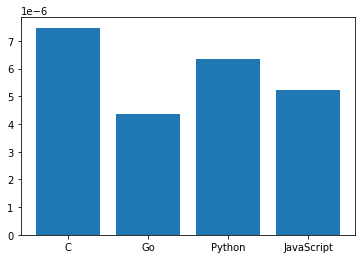

In [18]:
divs = [lexical_diversity(all_C), lexical_diversity(all_Go), lexical_diversity(all_Python), lexical_diversity(all_Javascript)]
plt.bar(widths, divs, tick_label = labels,
        width = 0.8)
plt.show()

## Average word length

In [19]:
def average(words):
    return (sum(len(word) for word in words) / len(words))


In [20]:

df_C['word_length'] = df_C['tokenized_text'].apply(average)
df_Go['word_length'] = df_Go['tokenized_text'].apply(average)
df_Python['word_length'] = df_Python['tokenized_text'].apply(average)
df_Javascript['word_length'] = df_Javascript['tokenized_text'].apply(average)


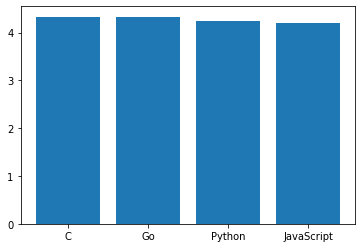

In [22]:
means = [np.mean(df_C['word_length']), np.mean(df_Go['word_length']), np.mean(df_Python['word_length']), np.mean(df_Javascript['word_length'])]
plt.bar(widths, means, tick_label = labels,
        width = 0.8)
plt.show()

## Count of words over 10 characters

In [28]:
def words_over_10(words):
    sum=0
    for word in words:
        if(len(word)>=10):
            sum+=1
    return sum

In [29]:
df_C['long_words'] = df_C['tokenized_text'].apply(words_over_10)
df_Go['long_words'] = df_Go['tokenized_text'].apply(words_over_10)
df_Python['long_words'] = df_Python['tokenized_text'].apply(words_over_10)
df_Javascript['long_words'] = df_Javascript['tokenized_text'].apply(words_over_10)

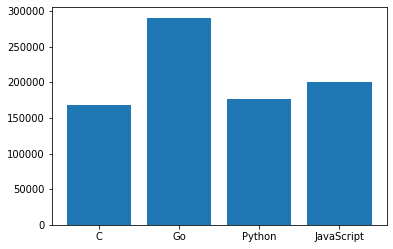

In [30]:
sums = [np.sum(df_C['long_words']), np.sum(df_Go['long_words']), np.sum(df_Python['long_words']), np.sum(df_Javascript['long_words'])]
plt.bar(widths, sums, tick_label = labels,
        width = 0.8)
plt.show()

## Frequency distribution

In [73]:
#it takes forever 
unique_C = set(all_C.split())
freq = []
for word in unique_C:
    freq.append((all_C.count(word), word))
    
sorted(freq)

KeyboardInterrupt: 